**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [1]:
# Numpy
import numpy as np

# Pandas
import pandas as pd

# Scikit Learn Functions
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import preprocessing

# Data Visualization
import seaborn as sns
%matplotlib inline 

# Suppress warning messages
import warnings
warnings.simplefilter("ignore")

# import data 2C_weka.csv for 2 Class Classifcation.


In [2]:
class_2_df = pd.read_csv('2Classdata.csv')

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [3]:
class_2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [4]:
class_2_df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [5]:
class_2_df.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [6]:
class_2_df.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


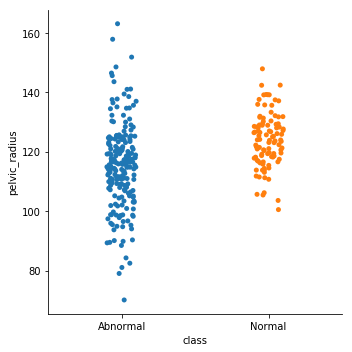

In [7]:
sns.catplot( x="class", y="pelvic_radius", data=class_2_df);

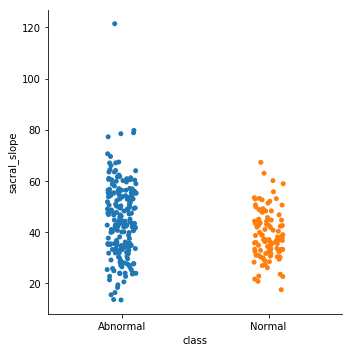

In [8]:
sns.catplot( x="class", y="sacral_slope", data=class_2_df);

In [9]:
# sns.pairplot(class_2_df)

# Encode the Class variable to integer.

In [10]:
class_2_df['class'] = class_2_df['class'].astype('category')


In [11]:
class_2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null category
dtypes: category(1), float64(6)
memory usage: 15.0 KB


In [12]:
class_2_df[['class']] = pd.get_dummies(class_2_df[['class']], drop_first=True)

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [13]:
X = class_2_df.drop(labels = 'class', axis = 1)

In [14]:
Y = class_2_df[['class']]

# Normalize your Data (X) to get values between 0 to 1.

In [15]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
output = min_max_scaler.fit_transform(X)

X = pd.DataFrame(output, columns=X.columns)

X.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,0.331276,0.430419,0.339450,0.273794,0.514452,0.086952
std,0.166237,0.178762,0.166043,0.124216,0.143215,0.087428
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195613,0.307608,0.205831,0.184895,0.436900,0.029474
50%,0.313862,0.409251,0.318253,0.268714,0.518189,0.053133
75%,0.450685,0.512180,0.438509,0.363946,0.595613,0.121847
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
Y = pd.get_dummies(Y, drop_first=True)

# Split the dat as train and test with a ratio of 70:30.

In [17]:
test_size = 0.30
seed = 7

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [19]:
# NNH = KNeighborsClassifier(n_neighbors= int(np.sqrt(class_2_df.shape[0])))
NNH = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [20]:
predicted_labels = NNH.predict(X_test)

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [21]:
NNH.score(X_test, y_test)

0.7526881720430108

In [22]:
metrics.confusion_matrix(y_test, predicted_labels)

array([[52,  7],
       [16, 18]], dtype=int64)

# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [23]:
kmax = int(np.sqrt(class_2_df.shape[0]))
krange = np.arange(1, kmax, 2)
max_acc = 0
k = 0

In [24]:
for n in krange:
    NNH = KNeighborsClassifier(n_neighbors=n, metric='euclidean')
    NNH.fit(X_train, y_train)
    score = NNH.score(X_test, y_test)
    if score > max_acc:
        k = n
        max_acc = score

In [25]:
print(f'Max accuracy {max_acc} was achieved when k={k}')

Max accuracy 0.8172043010752689 was achieved when k=7


# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [26]:
class_3_df = pd.read_csv('3Classdata.csv')
class_3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [27]:
class_3_df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [28]:
class_3_df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [29]:
class_3_df.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


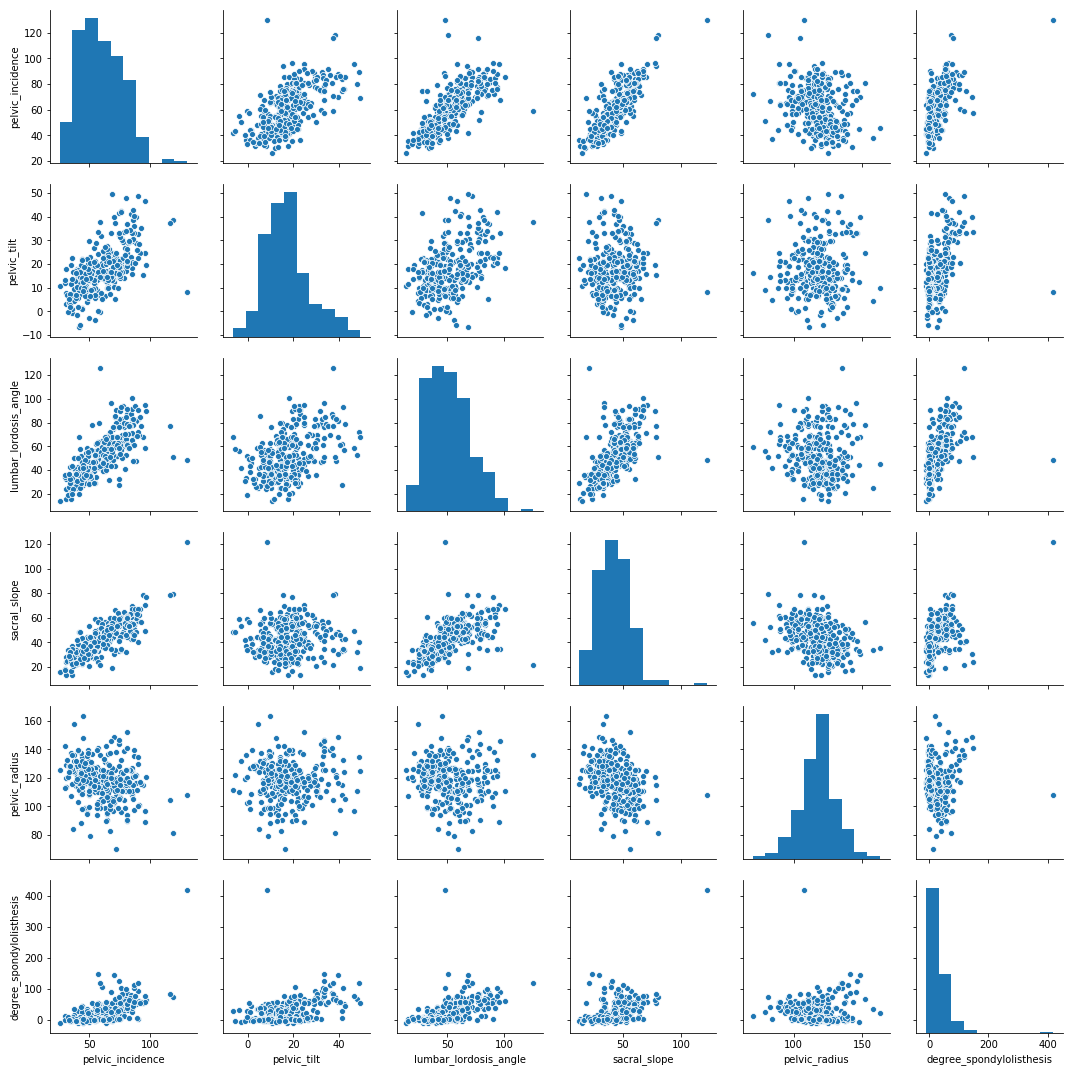

In [30]:
sns.pairplot(class_3_df)

In [31]:
class_3_df['class'] = class_3_df['class'].astype('category')
X = class_3_df.drop(labels = 'class', axis = 1)
Y = class_3_df[['class']]

In [32]:
scaler = MinMaxScaler()
output = scaler.fit_transform(X)

X = pd.DataFrame(output, columns=X.columns)
X.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,0.331276,0.430419,0.339450,0.273794,0.514452,0.086952
std,0.166237,0.178762,0.166043,0.124216,0.143215,0.087428
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195613,0.307608,0.205831,0.184895,0.436900,0.029474
50%,0.313862,0.409251,0.318253,0.268714,0.518189,0.053133
75%,0.450685,0.512180,0.438509,0.363946,0.595613,0.121847
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
encoder = preprocessing.LabelEncoder()
Y = encoder.fit_transform(Y)

In [34]:
test_size = 0.30
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

NNH = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [35]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.7096774193548387

In [36]:
metrics.confusion_matrix(y_test, predicted_labels)

array([[ 6,  4,  1],
       [11, 18,  5],
       [ 3,  3, 42]], dtype=int64)

In [37]:
kmax = int(np.sqrt(X_train.shape[0]))
krange = np.arange(3, kmax, 2)
max_acc = 0
k = 0

for n in krange:
    NNH = KNeighborsClassifier(n_neighbors=n, metric='euclidean')
    NNH.fit(X_train, y_train)
    score = NNH.score(X_test, y_test)
    if score > max_acc:
        k = n
        max_acc = score
        
print(f'Max accuracy {max_acc} was achieved when k={k}')

Max accuracy 0.8064516129032258 was achieved when k=11
